# Notebook 1: EDA and Data Cleaning

In this first notebook we load the two Spotify datasets (popular and non‑popular songs), perform basic exploratory data analysis (EDA), and do some initial cleaning. The goal is to create a clean file `spotify_clean.csv` that we will use in later notebooks for feature engineering and modeling.

## 1. Import libraries and load data

We start by importing the basic libraries (`pandas`, `numpy`, `matplotlib`, `seaborn`) and loading the two CSV files from Kaggle. We add a column `label_kaggle` which indicates whether the song was in the "high popularity" part (1) or "low popularity" part (0) of the original dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

# Load the two datasets from Kaggle
high_pop = pd.read_csv('high_popularity_spotify_data.csv')
low_pop = pd.read_csv('low_popularity_spotify_data.csv')

# Add the original Kaggle label (1 = popular, 0 = not popular)
high_pop['label_kaggle'] = 1
low_pop['label_kaggle'] = 0

# Concatenate into a single DataFrame
spotify_df = pd.concat([high_pop, low_pop], ignore_index=True)
spotify_df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,label_kaggle
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1


## 2. First exploration: shape, dtypes, and missing values

We check how many rows and columns we have, the data types of each column, and whether there are missing values. This helps us decide what to keep and how to clean the data.

In [2]:
# Dataset shape
print(f'Shape: {spotify_df.shape}')

# Basic information about the columns
spotify_df.info()

Shape: (4831, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4830 non-null   obj

In [3]:
# Descriptive statistics for numerical variables
spotify_df.describe().T

,count,mean,std,min,25%,50%,75%,max
energy,4830.0,0.586691,0.246263,0.000202,0.442250,0.633000,0.77700,0.998
tempo,4830.0,118.269293,28.512615,48.232000,96.063000,118.059500,136.72350,241.426
danceability,4830.0,0.622311,0.187706,0.058900,0.525000,0.653000,0.75800,0.979
loudness,4830.0,-9.281627,7.129396,-48.069000,-10.297750,-7.191000,-5.33675,1.318
liveness,4830.0,0.167613,0.124429,0.021000,0.095400,0.118000,0.19500,0.979
valence,4830.0,0.481930,0.258036,0.029600,0.275000,0.483000,0.69000,0.987
time_signature,4830.0,3.936646,0.409712,1.000000,4.000000,4.000000,4.00000,5.000
speechiness,4830.0,0.101738,0.101032,0.021900,0.038600,0.056100,0.11800,0.927
track_popularity,4831.0,54.761126,19.828573,11.000000,41.000000,56.000000,72.00000,100.000
instrumentalness,4830.0,0.201053,0.351918,0.000000,0.000000,0.000091,0.20050,0.991


In [4]:
# Count of missing values per column
spotify_df.isna().sum().sort_values(ascending=False)

energy                      1
uri                         1
type                        1
id                          1
acousticness                1
duration_ms                 1
key                         1
mode                        1
instrumentalness            1
tempo                       1
track_album_name            1
analysis_url                1
track_href                  1
valence                     1
speechiness                 1
danceability                1
time_signature              1
loudness                    1
liveness                    1
playlist_id                 0
playlist_subgenre           0
playlist_genre              0
track_artist                0
track_popularity            0
track_album_id              0
track_album_release_date    0
track_name                  0
track_id                    0
playlist_name               0
label_kaggle                0
dtype: int64

## 3. Remove purely ID / URL columns

Columns that are just **IDs**, URIs, or URLs do not carry musical information that is useful for predicting popularity. We drop them. We define a list of possible ID‑like columns and keep only those that are actually present in the dataset.

In [5]:
# Possible ID / URL columns
id_like_cols = [
    'track_id', 'track_uri', 'track_url', 'uri', 'id', 'url',
    'song_id', 'album_id', 'album_uri', 'artist_id', 'artist_uri', 'track_href', 'analysis_url', 'track_album_id', 'playlist_id'
]

# Intersection with existing columns
cols_to_drop = [c for c in id_like_cols if c in spotify_df.columns]
print('Columns to drop (if present):', cols_to_drop)

spotify_df = spotify_df.drop(columns=cols_to_drop)
spotify_df.head()

Columns to drop (if present): ['track_id', 'uri', 'id', 'track_href', 'analysis_url', 'track_album_id', 'playlist_id']


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_album_name,playlist_name,track_name,track_album_release_date,instrumentalness,mode,key,duration_ms,acousticness,playlist_subgenre,type,label_kaggle
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,100,Die With A Smile,Today's Top Hits,Die With A Smile,2024-08-16,0.0000,0.0,6.0,251668.0,0.3080,mainstream,audio_features,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,97,HIT ME HARD AND SOFT,Today's Top Hits,BIRDS OF A FEATHER,2024-05-17,0.0608,1.0,2.0,210373.0,0.2000,mainstream,audio_features,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,93,The Secret of Us (Deluxe),Today's Top Hits,That’s So True,2024-10-18,0.0000,1.0,1.0,166300.0,0.2140,mainstream,audio_features,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,81,Short n' Sweet,Today's Top Hits,Taste,2024-08-23,0.0000,0.0,0.0,157280.0,0.0939,mainstream,audio_features,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,98,APT.,Today's Top Hits,APT.,2024-10-18,0.0000,0.0,0.0,169917.0,0.0283,mainstream,audio_features,1


## 4. Separate numerical and categorical variables

For the next steps it is useful to build two lists: one for numerical columns (float or int) and one for categorical columns (object or category). Later we will apply different preprocessing steps to numerical vs categorical variables.

In [6]:
# Identify numerical and categorical columns
numeric_cols = spotify_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = spotify_df.select_dtypes(include=['object', 'category']).columns.tolist()

print('Number of numerical columns:', len(numeric_cols))
print('Number of categorical columns:', len(categorical_cols))
print('\nNumerical columns:', numeric_cols)
print('\nCategorical columns:', categorical_cols)

Number of numerical columns: 15
Number of categorical columns: 8

Numerical columns: ['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 'time_signature', 'speechiness', 'track_popularity', 'instrumentalness', 'mode', 'key', 'duration_ms', 'acousticness', 'label_kaggle']

Categorical columns: ['playlist_genre', 'track_artist', 'track_album_name', 'playlist_name', 'track_name', 'track_album_release_date', 'playlist_subgenre', 'type']


## 5. Univariate distributions of main audio variables

We plot histograms for some key audio variables (such as `energy`, `tempo`, `danceability`, `loudness`, `valence`, etc.) to understand their distributions. This helps us see outliers, skewness, and general shapes of the variables.

Audio features used for histograms: ['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 'speechiness', 'instrumentalness', 'acousticness', 'track_popularity']


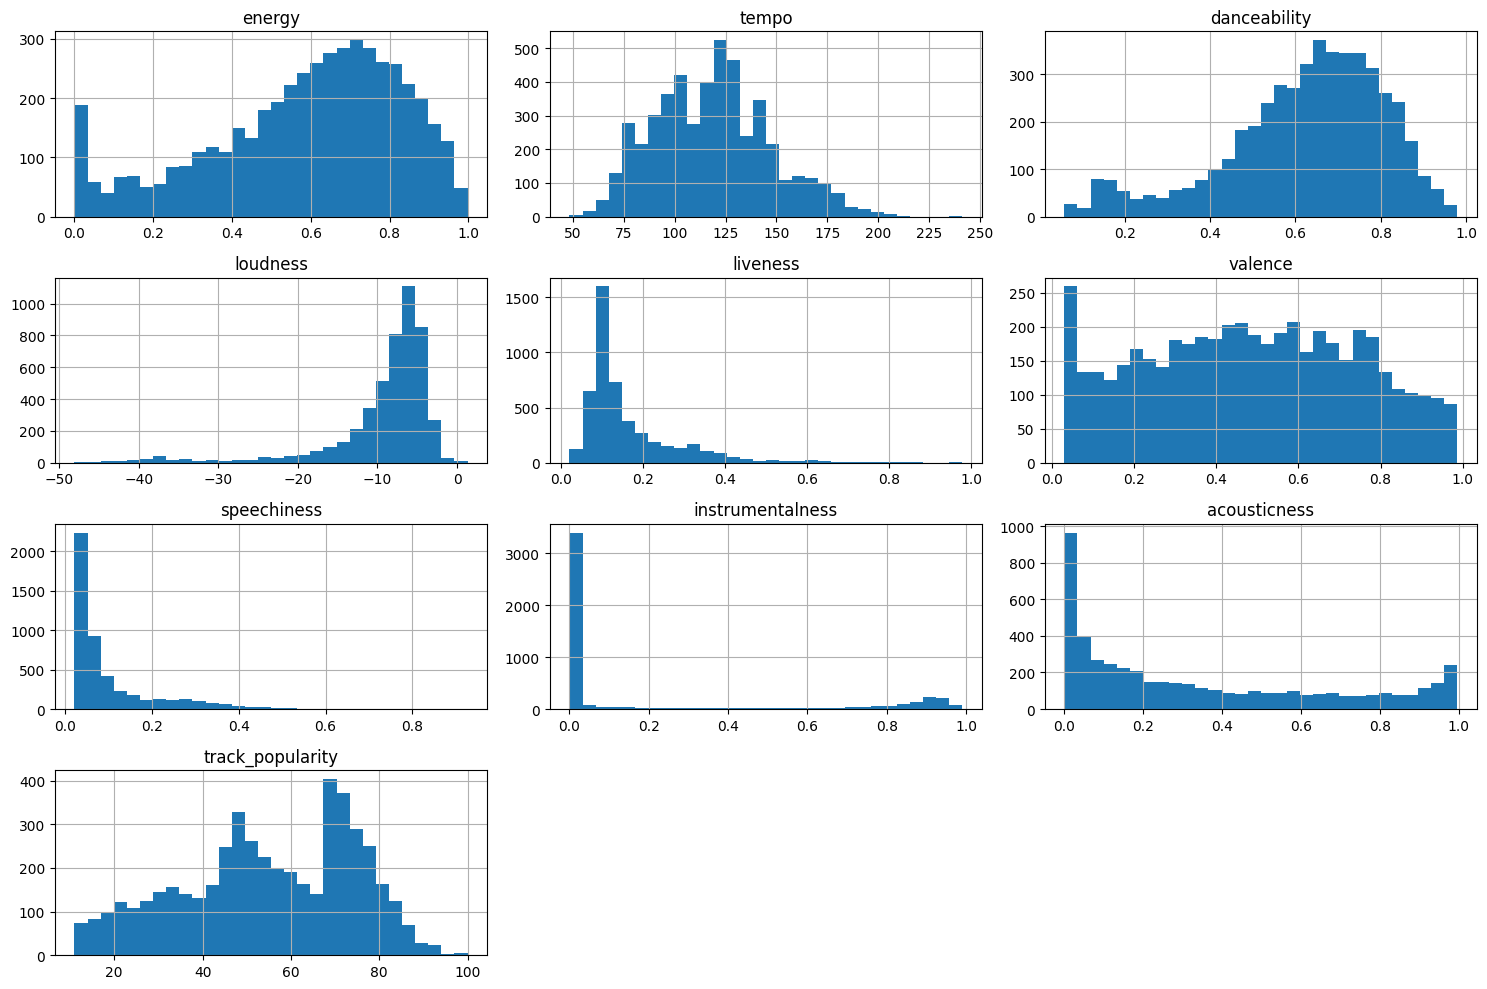

In [7]:
# Choose some common audio variables (if present)
audio_features = [
    'energy', 'tempo', 'danceability', 'loudness', 'liveness',
    'valence', 'speechiness', 'instrumentalness', 'acousticness',
    'track_popularity'
]

available_audio_features = [f for f in audio_features if f in numeric_cols]
print('Audio features used for histograms:', available_audio_features)

spotify_df[available_audio_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## 6. Correlation matrix and highly correlated features

We compute the **correlation matrix** among numerical audio variables. If two variables have a very high absolute correlation (for example > 0.70), they carry almost the same information. To avoid collinearity problems (especially for linear models) we may want to remove one of them.

We implement a simple rule: we scan the upper triangle of the correlation matrix and, whenever we find a pair with |correlation| > 0.70, we mark the second variable of the pair to be dropped.

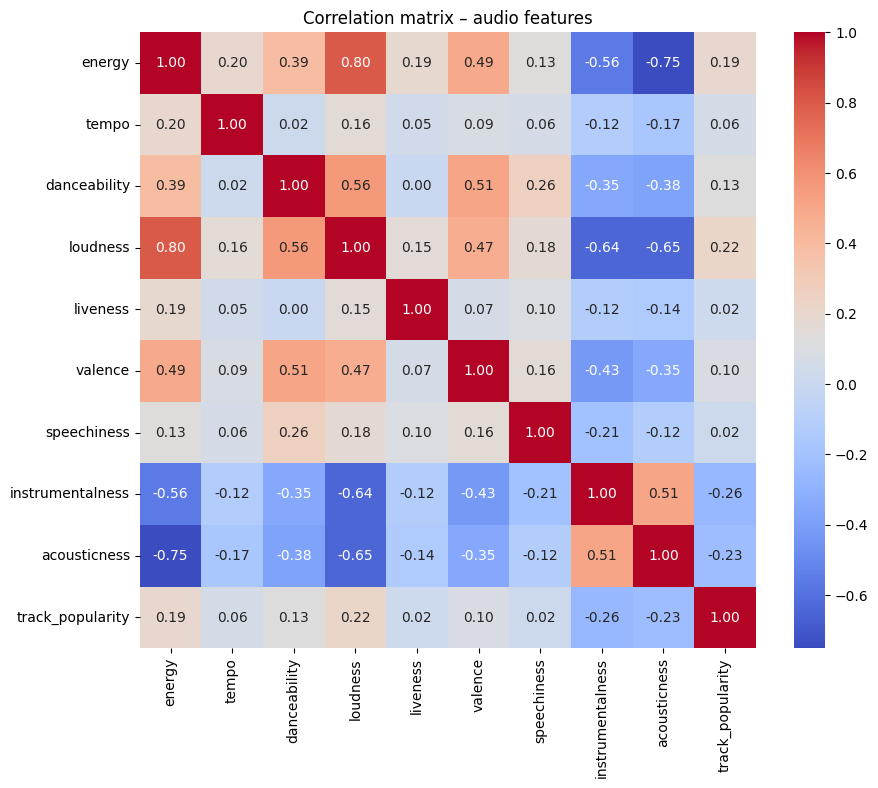

In [8]:
# Correlation matrix for selected numerical audio features
corr_matrix = spotify_df[available_audio_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix – audio features')
plt.show()

In [9]:
# Identify highly correlated columns (|corr| > 0.70)
threshold = 0.70
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

print('Highly correlated columns to consider dropping:', high_corr_to_drop)

# Create a cleaned copy for subsequent steps
spotify_clean = spotify_df.drop(columns=high_corr_to_drop)
spotify_clean.shape

Highly correlated columns to consider dropping: ['loudness', 'acousticness']


(4831, 21)

## 7. Treat key musical categorical variables

Some columns are coded as numbers but are actually **categorical** from a musical point of view, e.g. `key`, `mode`, `time_signature`. They represent categories (musical key, mode, time signature) and the numerical order is not meaningful as a magnitude or distance. We cast them to categorical type here. In this notebook we only show a simple example with `pd.get_dummies`, in later notebooks we will use systematic one‑hot encoding inside modeling pipelines.

In [10]:
# Explicitly cast some columns to categorical type, if they exist
for col in ['key', 'mode', 'time_signature']:
    if col in spotify_clean.columns:
        spotify_clean[col] = spotify_clean[col].astype('category')

if 'playlist_genre' in spotify_clean.columns:
    spotify_clean['playlist_genre'] = spotify_clean['playlist_genre'].astype('category')

spotify_clean.dtypes.head(20)

energy                       float64
tempo                        float64
danceability                 float64
playlist_genre              category
liveness                     float64
valence                      float64
track_artist                  object
time_signature              category
speechiness                  float64
track_popularity               int64
track_album_name              object
playlist_name                 object
track_name                    object
track_album_release_date      object
instrumentalness             float64
mode                        category
key                         category
duration_ms                  float64
playlist_subgenre             object
type                          object
dtype: object

In [11]:
# Example: one-hot encoding for a single categorical column (for example only)
if 'playlist_genre' in spotify_clean.columns:
    demo_dummies = pd.get_dummies(spotify_clean['playlist_genre'], prefix='genre', drop_first=True)
    demo_dummies.head()

## 8. Simple handling of missing values

For now we adopt a very simple rule: we drop rows that have too many missing values. In the modeling notebooks we will use more refined techniques (median/mode imputation inside pipelines).

In [12]:
# Fraction of non-missing values per row
row_non_null_ratio = spotify_clean.notna().mean(axis=1)
row_non_null_ratio.describe()

count    4831.000000
mean        0.999872
std         0.008250
min         0.428571
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64

In [13]:
# Keep only rows with at least 80% non-missing entries (standard empirical threshold)
mask = row_non_null_ratio >= 0.8
print('Total rows:', len(spotify_clean))
print('Rows kept (>= 80% non-NaN):', mask.sum())

spotify_clean = spotify_clean[mask].reset_index(drop=True)
spotify_clean.shape

Total rows: 4831
Rows kept (>= 80% non-NaN): 4830


(4830, 21)

## 9. Save the cleaned dataset

We save the resulting dataset as `spotify_clean.csv`. This will be the starting point for Notebook 2, where we will perform further **feature engineering** (for example, extracting the release year from the release date, converting duration to minutes, etc.).

In [14]:
spotify_clean.to_csv('spotify_clean.csv', index=False)
spotify_clean.head()

,energy,tempo,danceability,playlist_genre,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_album_name,playlist_name,track_name,track_album_release_date,instrumentalness,mode,key,duration_ms,playlist_subgenre,type,label_kaggle
0,0.592,157.969,0.521,pop,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,100,Die With A Smile,Today's Top Hits,Die With A Smile,2024-08-16,0.0000,0.0,6.0,251668.0,mainstream,audio_features,1
1,0.507,104.978,0.747,pop,0.117,0.438,Billie Eilish,4.0,0.0358,97,HIT ME HARD AND SOFT,Today's Top Hits,BIRDS OF A FEATHER,2024-05-17,0.0608,1.0,2.0,210373.0,mainstream,audio_features,1
2,0.808,108.548,0.554,pop,0.159,0.372,Gracie Abrams,4.0,0.0368,93,The Secret of Us (Deluxe),Today's Top Hits,That’s So True,2024-10-18,0.0000,1.0,1.0,166300.0,mainstream,audio_features,1
3,0.910,112.966,0.670,pop,0.304,0.786,Sabrina Carpenter,4.0,0.0634,81,Short n' Sweet,Today's Top Hits,Taste,2024-08-23,0.0000,0.0,0.0,157280.0,mainstream,audio_features,1
4,0.783,149.027,0.777,pop,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,98,APT.,Today's Top Hits,APT.,2024-10-18,0.0000,0.0,0.0,169917.0,mainstream,audio_features,1
